Julián Y. Torres Torres, Carlos J. Barreto Mora, Juan A. Angulo Rincón

PRoyecto Final

Universidad de los Andes, Bogotá, Colombia

{jy.torres, c.barretom, ja.angulor1}@uniandes.edu.co

In [2]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import shap

In [3]:
import os
file_path_1 = "Bases de datos/1_BAC.csv"
file_path_2 = "Bases de datos/2_BAC.csv"
file_path_3 = "Bases de datos/Catalogo_oficinas.csv"

df = pd.concat(
   map(pd.read_csv, [file_path_1, file_path_2]), ignore_index=True)

Catalogo = pd.read_csv(file_path_3,sep=';')
Catalogo['OficinaCD'] = Catalogo['OficinaCD'].round(decimals=0).astype(object)

In [4]:
Catalogo.dropna()

,OficinaCD,OficinaDesc,Zonal,Regional
0,16298.0,CB MISCELANEA Y LICORES LA 69,VALLE,OCCIDENTE
1,18354.0,CB HATO COROZAL,CASANARE,ORIENTE
2,19405.0,CB ALMACEN FERREOAGRO,VALLE NORTE,CAFETERA
3,12056.0,CB DROGAS DEL NORTE,CASANARE,ORIENTE
4,16176.0,CB CAFE INTERNET AGUILA INTERACTIVA.COM,BOGOTA,BOGOTA
...,...,...,...,...
16844,19429.0,CB CAFE INTERNET DANIBY COMUNICACIONES,CUNDINAMARCA OCCIDENTE,BOGOTA
16845,18015.0,SVT - PRINCIPAL RIOACHA,MAGDALENA,COSTA
16846,29274.0,CB CAFE INTERNET CENTRO DE COMUNICACIONES LA S...,CORDOBA,ANTIOQUIA
16847,17524.0,CB DROGAS DEL NORTE No 2,VALLE,OCCIDENTE


In [5]:
df_1 = pd.merge(df, Catalogo, how='left', left_on=df['SBAN'], right_on=Catalogo['OficinaCD'])

In [6]:
#Número de datos en cada una de las variables del dataframe
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050743 entries, 0 to 1050742
Data columns (total 57 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   key_0                            1050743 non-null  int64  
 1   FechaCorte                       1050743 non-null  object 
 2   ClienteID                        1050743 non-null  int64  
 3   SegmentoDesc                     1050743 non-null  object 
 4   SBAN                             1050743 non-null  int64  
 5   TipoDoctoIdentificacionCD        1050743 non-null  object 
 6   TipoPersonaDesc                  1050743 non-null  object 
 7   NaturalezaJuridicaDesc           1050731 non-null  object 
 8   SexoDesc                         1032305 non-null  object 
 9   Edad                             1032305 non-null  float64
 10  EstadoCivilDesc                  1022523 non-null  object 
 11  ProfesionDesc                    1023599 non-null 

In [7]:
#Registros con valores nulos 
df_1[df_1.Regional.isnull()]

,key_0,FechaCorte,ClienteID,SegmentoDesc,SBAN,TipoDoctoIdentificacionCD,TipoPersonaDesc,NaturalezaJuridicaDesc,SexoDesc,Edad,...,NumeroProductosCaptacion,SaldoTotalCaptaciones,NumCreditosVencidos,NumeroTCVencidas,NumOperacionesCarteraVencida,SaldoTotalCarteraVencida,OficinaCD,OficinaDesc,Zonal,Regional
332595,3029,2020-09-30,114914839,AGROPECUARIA,3029,CC,PERSONA,PARTICULAR,FEMENINO,26.0,...,1,0.0,0,0,0,0,NaN,NaN,NaN,NaN
734185,3029,2020-09-30,203103945,AGROPECUARIA,3029,CC,PERSONA,PARTICULAR,FEMENINO,21.0,...,1,0.0,0,0,0,0,NaN,NaN,NaN,NaN


In [8]:
df_1 = df_1[df_1.OficinaCD.notnull()].drop(['key_0','OficinaCD','OficinaDesc','Zonal'], axis=1)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050741 entries, 0 to 1050742
Data columns (total 53 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   FechaCorte                       1050741 non-null  object 
 1   ClienteID                        1050741 non-null  int64  
 2   SegmentoDesc                     1050741 non-null  object 
 3   SBAN                             1050741 non-null  int64  
 4   TipoDoctoIdentificacionCD        1050741 non-null  object 
 5   TipoPersonaDesc                  1050741 non-null  object 
 6   NaturalezaJuridicaDesc           1050729 non-null  object 
 7   SexoDesc                         1032303 non-null  object 
 8   Edad                             1032303 non-null  float64
 9   EstadoCivilDesc                  1022521 non-null  object 
 10  ProfesionDesc                    1023597 non-null  object 
 11  Cod_CIIU                         1050717 non-null 

In [9]:
df_1

,FechaCorte,ClienteID,SegmentoDesc,SBAN,TipoDoctoIdentificacionCD,TipoPersonaDesc,NaturalezaJuridicaDesc,SexoDesc,Edad,EstadoCivilDesc,...,SaldoCDAT,SaldoTotalCartera,NumeroOperacionesCartera,NumeroProductosCaptacion,SaldoTotalCaptaciones,NumCreditosVencidos,NumeroTCVencidas,NumOperacionesCarteraVencida,SaldoTotalCarteraVencida,Regional
0,2020-09-30,432064,AGROPECUARIA,2104,CC,PERSONA,PARTICULAR,MASCULINO,118.0,NaN,...,0.0,0.0,0,2,5016932.75,0,0,0,0,OCCIDENTE
1,2020-09-30,4661392,AGROPECUARIA,70,CC,PERSONA,PARTICULAR,MASCULINO,36.0,SOLTERO,...,0.0,0.0,0,2,15068450.16,0,0,0,0,BOGOTA
2,2020-09-30,4045005,AGROPECUARIA,4840,CC,PERSONA,PARTICULAR,MASCULINO,41.0,CASADO,...,0.0,5999542.0,1,1,4526.00,0,0,0,0,OCCIDENTE
3,2020-09-30,112514252,AGROPECUARIA,6048,CC,PERSONA,PARTICULAR,MASCULINO,43.0,SOLTERO,...,0.0,5674272.0,2,1,10135.00,0,0,0,0,SANTANDER
4,2020-09-30,7291870,AGROPECUARIA,2180,CC,PERSONA,PARTICULAR,FEMENINO,43.0,SOLTERO,...,0.0,0.0,0,2,3871.70,0,0,0,0,OCCIDENTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050738,2020-09-30,112977945,AGROPECUARIA,4842,CC,PERSONA,PARTICULAR,MASCULINO,34.0,SOLTERO,...,0.0,0.0,0,0,0.00,0,0,0,0,OCCIDENTE
1050739,2020-09-30,4857604,AGROPECUARIA,3360,CC,PERSONA,PARTICULAR,FEMENINO,62.0,SOLTERO,...,0.0,1178699.0,1,1,6237.00,0,0,0,0,ANTIOQUIA
1050740,2020-09-30,2018333,AGROPECUARIA,1316,CC,PERSONA,PARTICULAR,MASCULINO,64.0,SOLTERO,...,0.0,18870762.0,2,1,0.67,1,0,1,0,ANTIOQUIA
1050741,2020-09-30,58778467,AGROPECUARIA,6080,CC,PERSONA,PARTICULAR,MASCULINO,41.0,CASADO,...,0.0,0.0,0,1,9754.23,0,0,0,0,SANTANDER


In [10]:
print(f"Datasets lengh: {len(df_1)}")
for col in df_1.columns[0:17,]:
    print(f"Unique values for {col}: {len(set(df_1[col]))}")

Datasets lengh: 1050741
Unique values for FechaCorte: 1
Unique values for ClienteID: 1050741
Unique values for SegmentoDesc: 1
Unique values for SBAN: 785
Unique values for TipoDoctoIdentificacionCD: 9
Unique values for TipoPersonaDesc: 2
Unique values for NaturalezaJuridicaDesc: 3
Unique values for SexoDesc: 3
Unique values for Edad: 18553
Unique values for EstadoCivilDesc: 7
Unique values for ProfesionDesc: 153
Unique values for Cod_CIIU: 483
Unique values for ClienteFallecido: 2
Unique values for indClienteEsEmpleado: 3
Unique values for FechaVinculacionBAC: 16956
Unique values for EstadoClienteDesc: 2
Unique values for TipoClienteDesc: 2


In [11]:
pd.unique(df_1['TipoDoctoIdentificacionCD'])

array(['CC', 'N', 'CE', 'TI', 'NI', 'RC', 'PP', 'JU', 'PA'], dtype=object)

In [12]:
datos=df_1[df_1['TipoDoctoIdentificacionCD']=="CC"]

In [13]:
print(f"Datasets lengh: {len(datos)}")
for col in datos.columns[0:17,]:
    print(f"Unique values for {col}: {len(set(datos[col]))}")

Datasets lengh: 1031749
Unique values for FechaCorte: 1
Unique values for ClienteID: 1031749
Unique values for SegmentoDesc: 1
Unique values for SBAN: 785
Unique values for TipoDoctoIdentificacionCD: 1
Unique values for TipoPersonaDesc: 1
Unique values for NaturalezaJuridicaDesc: 2
Unique values for SexoDesc: 2
Unique values for Edad: 100
Unique values for EstadoCivilDesc: 7
Unique values for ProfesionDesc: 153
Unique values for Cod_CIIU: 417
Unique values for ClienteFallecido: 2
Unique values for indClienteEsEmpleado: 3
Unique values for FechaVinculacionBAC: 16934
Unique values for EstadoClienteDesc: 2
Unique values for TipoClienteDesc: 2


In [14]:
datos_1=datos.drop(['FechaCorte','SegmentoDesc','TipoPersonaDesc','Cod_CIIU'],axis=1)

In [15]:
datos_1.isnull().sum()

ClienteID                               0
SBAN                                    0
TipoDoctoIdentificacionCD               0
NaturalezaJuridicaDesc                 12
SexoDesc                                0
Edad                                    0
EstadoCivilDesc                      9780
ProfesionDesc                        8704
ClienteFallecido                        0
indClienteEsEmpleado                   11
FechaVinculacionBAC                    16
EstadoClienteDesc                       0
TipoClienteDesc                         0
ValorActivos                         8606
ValorEgresos                         7886
ValorIngresos                        7983
ValorOtrosingresos                 409925
ValorPatrimonio                      8606
TotalPasivos                         8768
NumCreditos                             0
SaldoCreditos                           0
SaldoCarteraVencida                     0
NumeroTC                                0
SaldoTC                           

In [16]:
print(pd.unique(datos_1['NaturalezaJuridicaDesc']))
print(pd.unique(datos_1['indClienteEsEmpleado']))
print(pd.unique(datos_1['FechaVinculacionBAC']))

['PARTICULAR' nan]
['N' 'S' nan]
['1982-12-30' '2006-02-09' '2004-11-11' ... '1976-09-12' '1979-10-22'
 '1980-03-09']


In [17]:
datos_1=datos_1.dropna(subset=['indClienteEsEmpleado', 'FechaVinculacionBAC'])

In [18]:
datos_1["NaturalezaJuridicaDesc"].fillna("PARTICULAR", inplace = True) 

In [19]:
pd.unique(datos_1['NaturalezaJuridicaDesc'])

array(['PARTICULAR'], dtype=object)

In [20]:
datos_1.isnull().sum()

ClienteID                               0
SBAN                                    0
TipoDoctoIdentificacionCD               0
NaturalezaJuridicaDesc                  0
SexoDesc                                0
Edad                                    0
EstadoCivilDesc                      9780
ProfesionDesc                        8704
ClienteFallecido                        0
indClienteEsEmpleado                    0
FechaVinculacionBAC                     0
EstadoClienteDesc                       0
TipoClienteDesc                         0
ValorActivos                         8595
ValorEgresos                         7875
ValorIngresos                        7972
ValorOtrosingresos                 409898
ValorPatrimonio                      8595
TotalPasivos                         8757
NumCreditos                             0
SaldoCreditos                           0
SaldoCarteraVencida                     0
NumeroTC                                0
SaldoTC                           

In [21]:
datos_2=datos_1.groupby("Regional")['Regional'].count()
datos_2

Regional
ANTIOQUIA    130923
BOGOTA       141525
CAFETERA      63606
COSTA         60384
OCCIDENTE    191238
ORIENTE      139880
SANTANDER    107208
SUR          196958
Name: Regional, dtype: int64

In [22]:
datos_3=datos_1[datos_1.Regional.isin(['BOGOTA','SUR','SANTANDER','CAFETERA'])]
print(f"Datasets lengh: {len(datos_3)}")
datos_3.isnull().sum()

Datasets lengh: 509297


ClienteID                               0
SBAN                                    0
TipoDoctoIdentificacionCD               0
NaturalezaJuridicaDesc                  0
SexoDesc                                0
Edad                                    0
EstadoCivilDesc                      4020
ProfesionDesc                        3627
ClienteFallecido                        0
indClienteEsEmpleado                    0
FechaVinculacionBAC                     0
EstadoClienteDesc                       0
TipoClienteDesc                         0
ValorActivos                         4279
ValorEgresos                         4040
ValorIngresos                        4078
ValorOtrosingresos                 195860
ValorPatrimonio                      4279
TotalPasivos                         4242
NumCreditos                             0
SaldoCreditos                           0
SaldoCarteraVencida                     0
NumeroTC                                0
SaldoTC                           

In [23]:
datos_4=datos_3.fillna({'EstadoCivilDesc':'NO REPORTA','ProfesionDesc':'NO REPORTA'})

In [24]:
datos_4["ValorOtrosingresos"].fillna(0, inplace = True)

In [25]:
na_cols = datos_4.isna().any()
na_cols = na_cols[na_cols == True].reset_index()
na_cols = na_cols["index"].tolist()
for col in datos_4.columns[1:]:
     if col in na_cols:
        if datos_4[col].dtype != 'object':
             datos_4[col] =  datos_4[col].fillna(datos_4[col].mean()).round(0)

In [26]:
print(f"Datasets lengh: {len(datos_4)}")
datos_4.isnull().sum()

Datasets lengh: 509297


ClienteID                          0
SBAN                               0
TipoDoctoIdentificacionCD          0
NaturalezaJuridicaDesc             0
SexoDesc                           0
Edad                               0
EstadoCivilDesc                    0
ProfesionDesc                      0
ClienteFallecido                   0
indClienteEsEmpleado               0
FechaVinculacionBAC                0
EstadoClienteDesc                  0
TipoClienteDesc                    0
ValorActivos                       0
ValorEgresos                       0
ValorIngresos                      0
ValorOtrosingresos                 0
ValorPatrimonio                    0
TotalPasivos                       0
NumCreditos                        0
SaldoCreditos                      0
SaldoCarteraVencida                0
NumeroTC                           0
SaldoTC                            0
SaldoTCVencido                     0
NumeroSobregisrosUso               0
SaldoSobregirosUso                 0
S

In [27]:
print(pd.unique(datos_1['EstadoClienteDesc']))

['INACTIVO' 'ACTIVO']


In [28]:
datos_4['Churn']=datos_4['EstadoClienteDesc'].map({'INACTIVO':0,'ACTIVO':1})

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


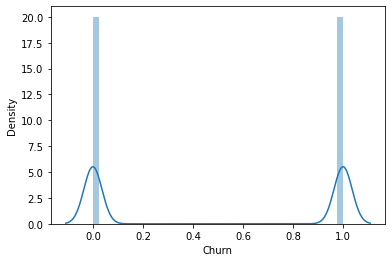

In [29]:
plot=sns.distplot(datos_4['Churn'])

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


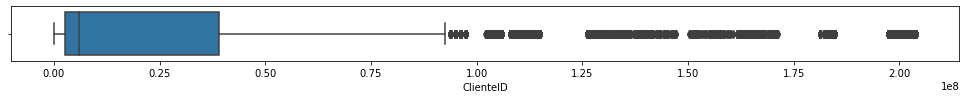

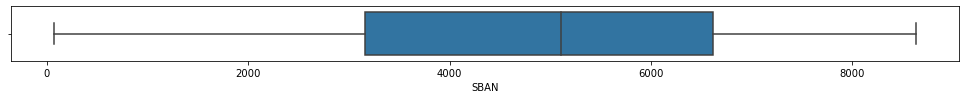

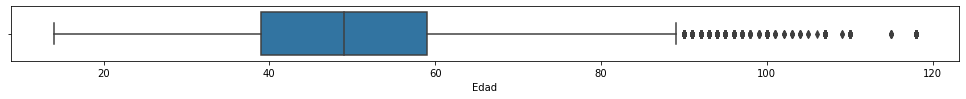

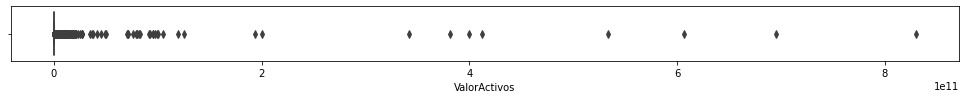

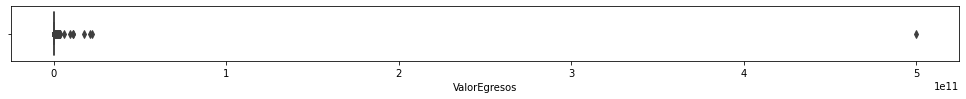

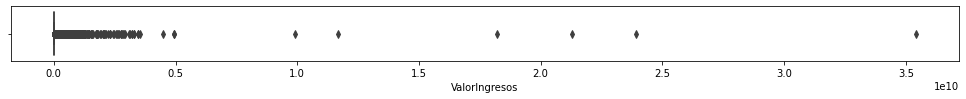

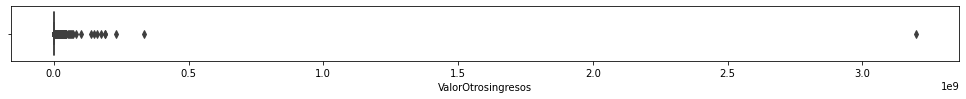

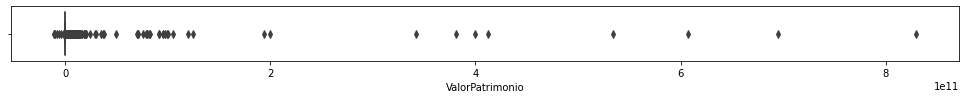

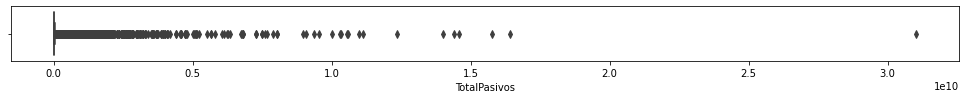

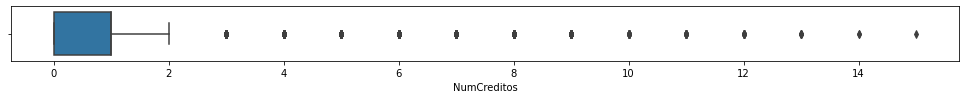

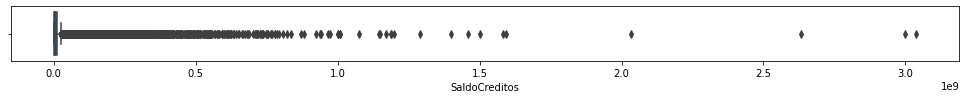

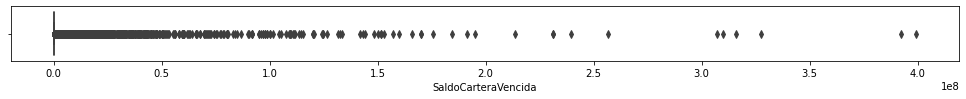

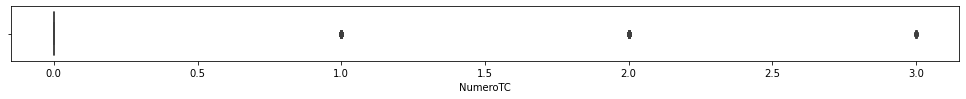

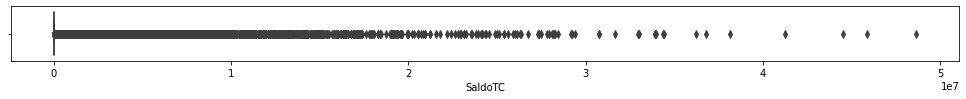

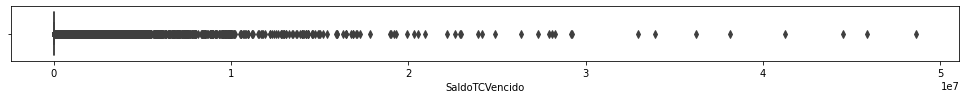

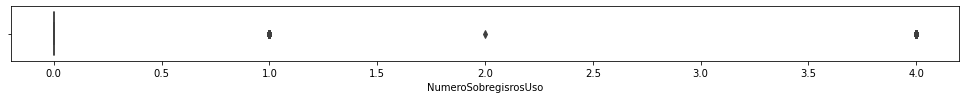

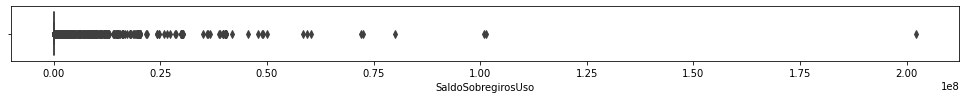

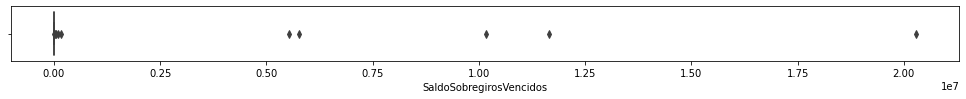

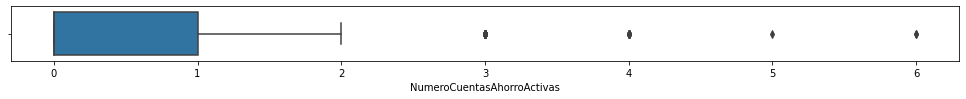

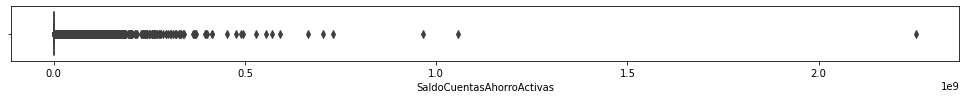

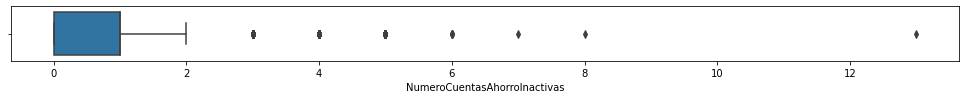

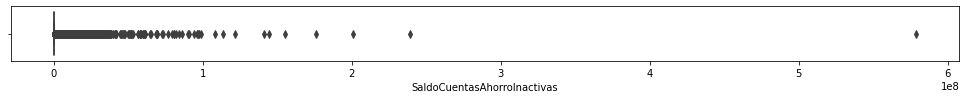

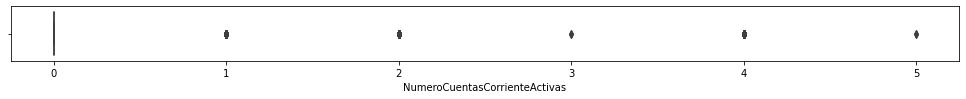

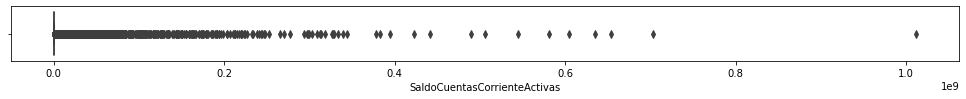

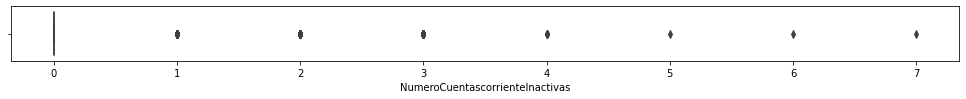

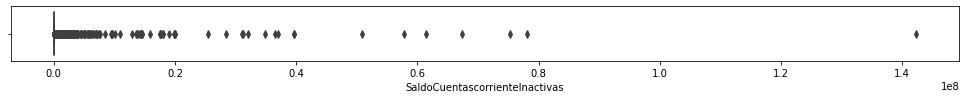

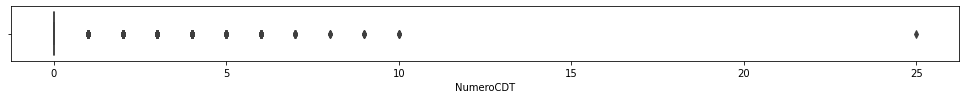

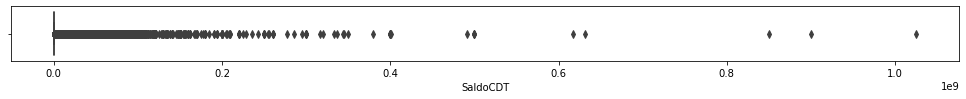

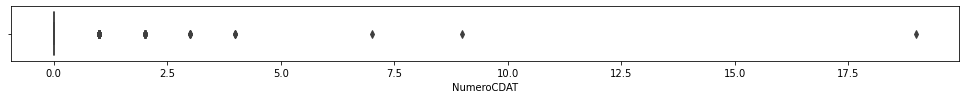

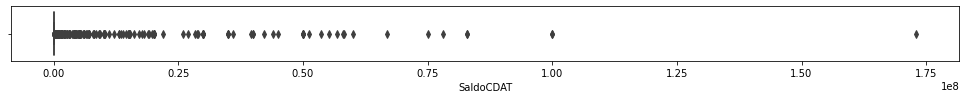

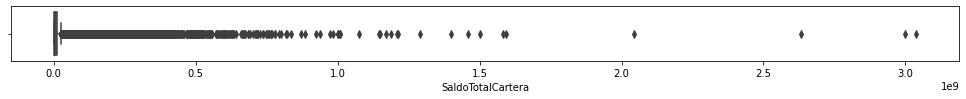

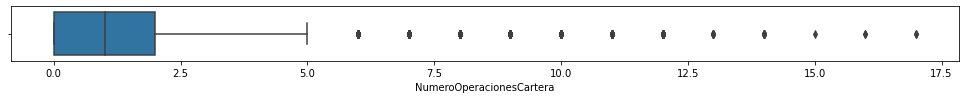

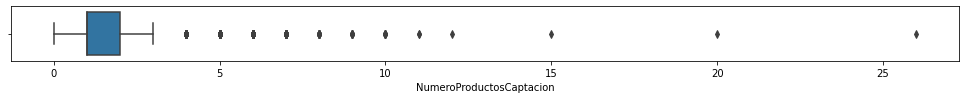

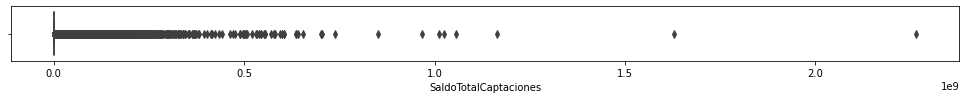

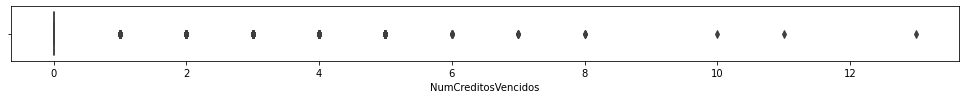

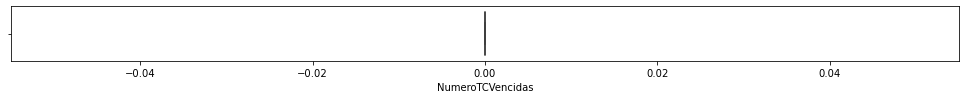

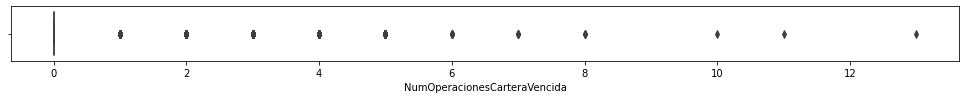

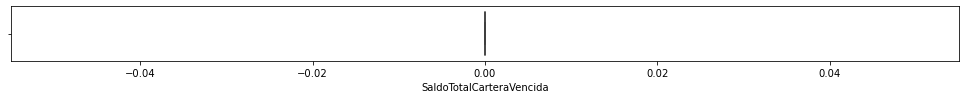

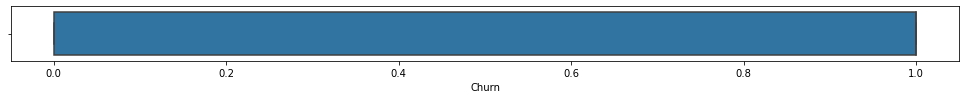

In [30]:
df1=datos_4.select_dtypes(exclude=['object'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)

In [31]:
datos[datos.duplicated()==True]

,FechaCorte,ClienteID,SegmentoDesc,SBAN,TipoDoctoIdentificacionCD,TipoPersonaDesc,NaturalezaJuridicaDesc,SexoDesc,Edad,EstadoCivilDesc,...,SaldoCDAT,SaldoTotalCartera,NumeroOperacionesCartera,NumeroProductosCaptacion,SaldoTotalCaptaciones,NumCreditosVencidos,NumeroTCVencidas,NumOperacionesCarteraVencida,SaldoTotalCarteraVencida,Regional


In [32]:
datos=datos.drop(['FechaCorte'],axis=1)

In [33]:
datos_4.isnull().sum()

ClienteID                          0
SBAN                               0
TipoDoctoIdentificacionCD          0
NaturalezaJuridicaDesc             0
SexoDesc                           0
Edad                               0
EstadoCivilDesc                    0
ProfesionDesc                      0
ClienteFallecido                   0
indClienteEsEmpleado               0
FechaVinculacionBAC                0
EstadoClienteDesc                  0
TipoClienteDesc                    0
ValorActivos                       0
ValorEgresos                       0
ValorIngresos                      0
ValorOtrosingresos                 0
ValorPatrimonio                    0
TotalPasivos                       0
NumCreditos                        0
SaldoCreditos                      0
SaldoCarteraVencida                0
NumeroTC                           0
SaldoTC                            0
SaldoTCVencido                     0
NumeroSobregisrosUso               0
SaldoSobregirosUso                 0
S

In [34]:
datos_nulos=datos[datos.NaturalezaJuridicaDesc.isnull()]
datos_nulos

,ClienteID,SegmentoDesc,SBAN,TipoDoctoIdentificacionCD,TipoPersonaDesc,NaturalezaJuridicaDesc,SexoDesc,Edad,EstadoCivilDesc,ProfesionDesc,...,SaldoCDAT,SaldoTotalCartera,NumeroOperacionesCartera,NumeroProductosCaptacion,SaldoTotalCaptaciones,NumCreditosVencidos,NumeroTCVencidas,NumOperacionesCarteraVencida,SaldoTotalCarteraVencida,Regional
100622,202113758,AGROPECUARIA,6915,CC,PERSONA,NaN,MASCULINO,29.0,SOLTERO,SIN PROFESION,...,0.0,0.0,0,1,6106.0,0,0,0,0,OCCIDENTE
104128,184160841,AGROPECUARIA,7370,CC,PERSONA,NaN,MASCULINO,30.0,SOLTERO,SIN PROFESION,...,0.0,0.0,0,1,6346.0,0,0,0,0,BOGOTA
394234,201414323,AGROPECUARIA,5130,CC,PERSONA,NaN,FEMENINO,21.0,SOLTERO,INGENIERO,...,0.0,0.0,0,2,126956.0,0,0,0,0,SANTANDER
505138,198803886,AGROPECUARIA,1428,CC,PERSONA,NaN,MASCULINO,36.0,SOLTERO,SIN PROFESION,...,0.0,0.0,0,1,31642.6,0,0,0,0,ANTIOQUIA
547658,202113883,AGROPECUARIA,4230,CC,PERSONA,NaN,MASCULINO,58.0,SOLTERO,SIN PROFESION,...,0.0,0.0,0,1,3179.0,0,0,0,0,COSTA
554815,202099649,AGROPECUARIA,4816,CC,PERSONA,NaN,MASCULINO,28.0,SOLTERO,SIN PROFESION,...,0.0,0.0,0,1,2134639.0,0,0,0,0,OCCIDENTE
603425,201536463,AGROPECUARIA,360,CC,PERSONA,NaN,MASCULINO,21.0,SOLTERO,SIN PROFESION,...,0.0,0.0,0,1,8000.0,0,0,0,0,BOGOTA
629220,128853041,AGROPECUARIA,6921,CC,PERSONA,NaN,MASCULINO,67.0,UNION LIBRE,"TECNICO PROFESIONAL - INGENIERIA, ARQUITECTURA...",...,0.0,12599389.0,1,2,1412953.0,0,0,0,0,OCCIDENTE
666352,140880243,AGROPECUARIA,4884,CC,PERSONA,NaN,MASCULINO,21.0,SOLTERO,SIN PROFESION,...,0.0,5000000.0,1,2,17356.0,0,0,0,0,OCCIDENTE
728830,201241040,AGROPECUARIA,6032,CC,PERSONA,NaN,MASCULINO,21.0,SOLTERO,INGENIERO,...,0.0,22000000.0,1,2,1349.0,0,0,0,0,SANTANDER


In [35]:
datos_4

,ClienteID,SBAN,TipoDoctoIdentificacionCD,NaturalezaJuridicaDesc,SexoDesc,Edad,EstadoCivilDesc,ProfesionDesc,ClienteFallecido,indClienteEsEmpleado,...,SaldoTotalCartera,NumeroOperacionesCartera,NumeroProductosCaptacion,SaldoTotalCaptaciones,NumCreditosVencidos,NumeroTCVencidas,NumOperacionesCarteraVencida,SaldoTotalCarteraVencida,Regional,Churn
1,4661392,70,CC,PARTICULAR,MASCULINO,36.0,SOLTERO,SIN PROFESION,S/D,N,...,0.0,0,2,15068450.16,0,0,0,0,BOGOTA,0
3,112514252,6048,CC,PARTICULAR,MASCULINO,43.0,SOLTERO,SIN PROFESION,S/D,N,...,5674272.0,2,1,10135.00,0,0,0,0,SANTANDER,0
7,202348085,820,CC,PARTICULAR,FEMENINO,43.0,SOLTERO,ZOOTECNISTA,S/D,N,...,0.0,0,1,16336.00,0,0,0,0,BOGOTA,0
11,103657260,6660,CC,PARTICULAR,FEMENINO,64.0,CASADO,SIN PROFESION,S/D,N,...,0.0,0,1,6989978.00,0,0,0,0,SUR,0
12,111512743,3950,CC,PARTICULAR,MASCULINO,30.0,UNION LIBRE,SIN PROFESION,S/D,N,...,4999926.0,1,1,7276.00,0,0,0,0,SUR,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050722,9082425,6017,CC,PARTICULAR,MASCULINO,42.0,CASADO,SIN PROFESION,S/D,N,...,0.0,0,1,4331.00,0,0,0,0,SANTANDER,1
1050724,9600217,230,CC,PARTICULAR,FEMENINO,36.0,SEPARADO,SIN PROFESION,S/D,N,...,0.0,0,1,2727.00,0,0,0,0,BOGOTA,1
1050727,553478,6653,CC,PARTICULAR,MASCULINO,73.0,VIUDO,SIN PROFESION,S/D,N,...,1923616.0,1,0,0.00,0,0,0,0,SUR,1
1050731,2782949,3901,CC,PARTICULAR,FEMENINO,43.0,UNION LIBRE,SIN PROFESION,S/D,N,...,0.0,0,2,102025.00,0,0,0,0,SUR,0


In [36]:
datos_4.dtypes

ClienteID                            int64
SBAN                                 int64
TipoDoctoIdentificacionCD           object
NaturalezaJuridicaDesc              object
SexoDesc                            object
Edad                               float64
EstadoCivilDesc                     object
ProfesionDesc                       object
ClienteFallecido                    object
indClienteEsEmpleado                object
FechaVinculacionBAC                 object
EstadoClienteDesc                   object
TipoClienteDesc                     object
ValorActivos                       float64
ValorEgresos                       float64
ValorIngresos                      float64
ValorOtrosingresos                 float64
ValorPatrimonio                    float64
TotalPasivos                       float64
NumCreditos                          int64
SaldoCreditos                      float64
SaldoCarteraVencida                  int64
NumeroTC                             int64
SaldoTC    

In [37]:
datos_4['FechaVinculacionBAC']=datos_4['FechaVinculacionBAC'].apply(pd.to_datetime)

In [38]:
datos_4.dtypes

ClienteID                                   int64
SBAN                                        int64
TipoDoctoIdentificacionCD                  object
NaturalezaJuridicaDesc                     object
SexoDesc                                   object
Edad                                      float64
EstadoCivilDesc                            object
ProfesionDesc                              object
ClienteFallecido                           object
indClienteEsEmpleado                       object
FechaVinculacionBAC                datetime64[ns]
EstadoClienteDesc                          object
TipoClienteDesc                            object
ValorActivos                              float64
ValorEgresos                              float64
ValorIngresos                             float64
ValorOtrosingresos                        float64
ValorPatrimonio                           float64
TotalPasivos                              float64
NumCreditos                                 int64


In [39]:
#Variables categóricas
print("Valores posibles de la variable TipoDoctoIdentificacionCD")
print(datos_4['TipoDoctoIdentificacionCD'].unique())
print()
print("Valores posibles de la variable NaturalezaJuridicaDesc")
print(datos_4['NaturalezaJuridicaDesc'].unique())
print
print("Valores posibles de la variable SexoDesc")
print(datos_4['SexoDesc'].unique())
print()
print("Valores posibles de la variable EstadoCivilDesc")
print(datos_4['EstadoCivilDesc'].unique())
print()
print("Valores posibles de la variable ProfesionDesc")
print(datos_4['ProfesionDesc'].unique())
print()
print("Valores posibles de la variable ClienteFallecido")
print(datos_4['ClienteFallecido'].unique())
print()
print("Valores posibles de la variable EstadoClienteDesc")
print(datos_4['EstadoClienteDesc'].unique())
print()
print("Valores posibles de la variable TipoClienteDesc")
print(datos_4['TipoClienteDesc'].unique())
print()
print("Valores posibles de la variable Regional")
print(datos_4['Regional'].unique())
print()
print("Valores posibles de la variable indClienteEsEmpleado")
print(datos_4['indClienteEsEmpleado'].unique())
print()

Valores posibles de la variable TipoDoctoIdentificacionCD
['CC']

Valores posibles de la variable NaturalezaJuridicaDesc
['PARTICULAR']
Valores posibles de la variable SexoDesc
['MASCULINO' 'FEMENINO']

Valores posibles de la variable EstadoCivilDesc
['SOLTERO' 'CASADO' 'UNION LIBRE' 'SEPARADO' 'VIUDO' 'DIVORCIADO'
 'NO REPORTA']

Valores posibles de la variable ProfesionDesc
['SIN PROFESION' 'ZOOTECNISTA' 'AGRICULTOR' 'DOCENTE' 'AGRONOMO'
 'GANADERO' 'TECNICO PROFESIONAL - AGRONOMIA, VETERINARIA Y AFINES'
 'ADMINISTRADOR DEL MEDIO AMBIENTE' 'ADMINISTRADOR AGROPECUARIO'
 'ADMINISTRADOR DE COMERCIO EXTERIOR'
 'TECNICO PROFESIONAL - ECONOMIA, ADMINISTRACION Y CONTADURIA'
 'ENFERMERIA' 'NO REPORTA' 'ADMINISTRADOR DE  EMPRESAS' 'INGENIERO CIVIL'
 'ABOGADO' 'MEDICO VETERINARIO'
 'TECNOLOGO - INGENIERIA, ARQUITECTURA, URBANISMO Y AFINES'
 'TECNOLOGO - AGRONOMIA, VETERINARIA Y AFINES' 'INGENIERO AGRONOMICO'
 'CONTADOR' 'ADMINISTRADOR PUBLICO' 'IDIOMAS' 'INGENIERO AGROAMBIENTAL'
 'ARQUITECTO' 

In [40]:
#Se separan las variables categóricas ya con los datos corregidos
Categorical=datos_4.select_dtypes(include=['object'])
rows,col=(Categorical.shape)
print("El número de variables categóricas es:",col)
print(Categorical.columns)

El número de variables categóricas es: 10
Index(['TipoDoctoIdentificacionCD', 'NaturalezaJuridicaDesc', 'SexoDesc',
       'EstadoCivilDesc', 'ProfesionDesc', 'ClienteFallecido',
       'indClienteEsEmpleado', 'EstadoClienteDesc', 'TipoClienteDesc',
       'Regional'],
      dtype='object')


In [41]:
df4=datos_4.drop(['ClienteID','SBAN','TipoDoctoIdentificacionCD','NaturalezaJuridicaDesc','EstadoClienteDesc','ClienteFallecido','FechaVinculacionBAC'], axis=1)
df4

,SexoDesc,Edad,EstadoCivilDesc,ProfesionDesc,indClienteEsEmpleado,TipoClienteDesc,ValorActivos,ValorEgresos,ValorIngresos,ValorOtrosingresos,...,SaldoTotalCartera,NumeroOperacionesCartera,NumeroProductosCaptacion,SaldoTotalCaptaciones,NumCreditosVencidos,NumeroTCVencidas,NumOperacionesCarteraVencida,SaldoTotalCarteraVencida,Regional,Churn
1,MASCULINO,36.0,SOLTERO,SIN PROFESION,N,Cliente Comercialmente Gestionable,25000000.0,140000.0,520000.0,0.0,...,0.0,0,2,15068450.16,0,0,0,0,BOGOTA,0
3,MASCULINO,43.0,SOLTERO,SIN PROFESION,N,Cliente Comercialmente Gestionable,28000000.0,500000.0,1800000.0,0.0,...,5674272.0,2,1,10135.00,0,0,0,0,SANTANDER,0
7,FEMENINO,43.0,SOLTERO,ZOOTECNISTA,N,Cliente Comercialmente Gestionable,110000000.0,1200000.0,3000000.0,0.0,...,0.0,0,1,16336.00,0,0,0,0,BOGOTA,0
11,FEMENINO,64.0,CASADO,SIN PROFESION,N,Cliente Comercialmente Gestionable,100000000.0,600000.0,900000.0,0.0,...,0.0,0,1,6989978.00,0,0,0,0,SUR,0
12,MASCULINO,30.0,UNION LIBRE,SIN PROFESION,N,Cliente Comercialmente Gestionable,39645000.0,474000.0,2388000.0,0.0,...,4999926.0,1,1,7276.00,0,0,0,0,SUR,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050722,MASCULINO,42.0,CASADO,SIN PROFESION,N,Cliente Comercialmente Gestionable,25000000.0,800000.0,2500000.0,0.0,...,0.0,0,1,4331.00,0,0,0,0,SANTANDER,1
1050724,FEMENINO,36.0,SEPARADO,SIN PROFESION,N,Cliente Comercialmente Gestionable,50000000.0,1500000.0,3200000.0,0.0,...,0.0,0,1,2727.00,0,0,0,0,BOGOTA,1
1050727,MASCULINO,73.0,VIUDO,SIN PROFESION,N,Cliente Comercialmente Gestionable,61000000.0,800000.0,2800000.0,0.0,...,1923616.0,1,0,0.00,0,0,0,0,SUR,1
1050731,FEMENINO,43.0,UNION LIBRE,SIN PROFESION,N,Cliente Convenio,35000000.0,580000.0,1500000.0,0.0,...,0.0,0,2,102025.00,0,0,0,0,SUR,0


In [42]:
#Se reemplazan las variables categóricas por valores númericos
df5=df4
df5['SexoDesc']=df5['SexoDesc'].map({'MASCULINO':0, 'FEMENINO':1})

df5['EstadoCivilDesc']=df5['EstadoCivilDesc'].map({'SOLTERO':0, 'CASADO':1, 'UNION LIBRE':2, 'SEPARADO':3, 'VIUDO':5, 'DIVORCIADO':6,'NO REPORTA':7})

df5['ProfesionDesc']=df5['ProfesionDesc'].map({'SIN PROFESION':0, 'ZOOTECNISTA':1, 'AGRICULTOR':2, 'DOCENTE':3, 'AGRONOMO':4,
 'GANADERO':5, 'TECNICO PROFESIONAL - AGRONOMIA, VETERINARIA Y AFINES':6,
 'ADMINISTRADOR DEL MEDIO AMBIENTE':7, 'ADMINISTRADOR AGROPECUARIO':8,
 'ADMINISTRADOR DE COMERCIO EXTERIOR':9,
 'TECNICO PROFESIONAL - ECONOMIA, ADMINISTRACION Y CONTADURIA':10,
 'ENFERMERIA':151,'NO REPORTA':149, 'ADMINISTRADOR DE  EMPRESAS':11, 'INGENIERO CIVIL':12,
 'ABOGADO':13, 'MEDICO VETERINARIO':14,
 'TECNOLOGO - INGENIERIA, ARQUITECTURA, URBANISMO Y AFINES':15,
 'TECNOLOGO - AGRONOMIA, VETERINARIA Y AFINES':16, 'INGENIERO AGRONOMICO':17,
 'CONTADOR':18, 'ADMINISTRADOR PUBLICO':19, 'IDIOMAS':20, 'INGENIERO AGROAMBIENTAL':21,
 'ARQUITECTO':22, 'INGENIERO DE SISTEMAS':23, 'ADMINISTRADOR COMERCIAL':24,
 'INGENIERO MECANICO':25, 'ODONTOLOGO':26, 'PSICOLOGO':27, 'INGENIERO AMBIENTAL':28,
 'FISIOTERAPISTA':29,
 'TECNOLOGO - ECONOMIA, ADMINISTRACION, CONTADURIA Y AFINES':30,
 'TECNICO PROFESIONAL - CIENCIAS DE LA SALUD':31, 'FARMACIA':32, 'LICENCIADO':33,
 'GASTRONOMO Y COCINA PROFESIONAL':34, 'PILOTO CIVIL':35, 'INGENIERO AGROFORESTAL':36,
 'COMUNICACION SOCIAL':37, 'INGENIERO ELECTRICO':38, 'ADMINISTRADOR INFORMATICO':39,
 'QUIMICO':40, 'SALUD OCUPACIONAL':41, 'ECONOMISTA':42, 'ADMINISTRADOR LOGISTICO':43,
 'SECRETARIA':44, 'PRE ESCOLAR':45, 'ADMINISTRADOR HOTELERO':46,
 'TECNICO PROFESIONAL - INGENIERIA, ARQUITECTURA Y URBANISMO':47,
 'TECNOLOGO - BELLAS ARTES':48, 'FONOAUDIOLOGO':49, 'INGENIERO AGRICOLA':50,
 'DISENO INDUSTRIAL':51, 'ECOLOGO':52, 'TECNOLOGO - CIENCIAS DE LA SALUD':53,
 'PUBLICISTA':54, 'INGENIERO ELECTRONICO':55,
 'ADMINISTRADOR BANCARIO Y FINANCIERO':56, 'MERCADEO':57, 'DISENO GRAFICO':58,
 'TECNICO PROFESIONAL - CIENCIAS SOCIALES, DERECHO Y POLITICA':59,
 'INGENIERO INDUSTRIAL':150, 'INGENIERO FINANCIERO':60,
 'TECNICO PROFESIONAL - CIENCIAS DE LA EDUCACION':61, 'TRABAJO SOCIAL':62,
 'INGENIERO':63, 'MUSICA INSTRUMENTAL':64, 'DISENO DE MODAS':65, 'AGROLOGO':66,
 'FOTOGRAFO':67, 'MEDICO DERMATOLOGO':68, 'ADMINISTRADOR DE OBRAS CIVILES':69,
 'MEDICO GENERAL':70, 'BIOLOGO':71, 'FINANZAS':72, 'TEOLOGO':73, 'PERIODISTA':74,
 'COMERCIO EXTERIOR':75, 'INGENIERO QUIMICO':76, 'INGENIERO DE ALIMENTOS':77,
 'FILOSOFO':78, 'TELECOMUNICACIONES':79, 'TECNICO PROFESIONAL - BELLAS ARTES':80,
 'GEOLOGO':81, 'CIENCIAS SOCIALES':82,
 'TECNOLOGO - HUMANIDADES Y CIENCIAS RELIGIOSAS':83,
 'INSTRUMENTACION QUIRURGICA':84, 'SOCIOLOGO':85,
 'INGENIERO DE PRODUCCION AGRICOLA':86, 'GEOGRAFO':87, 'MILITAR':88,
 'TECNOLOGO - MATEMATICAS Y CIENCIAS NATURALES':89, 'ANTROPOLOGO':90,
 'ADMINISTRADOR EN SALUD':91, 'BELLAS ARTES':92, 'MEDICO OFTALMOLOGO':93,
 'CRIMINALISTICA':94, 'HOTELERIA Y TURISMO':95,
 'TECNOLOGO - CIENCIAS SOCIALES, DERECHO Y POLITICA':96, 'COSMETOLOGO':97,
 'DEPORTE Y ACTIVIDAD FISICA':98, 'MATEMATICO':99, 'CINE Y TELEVISION':100,
 'MICROBIOLOGIA':101, 'ESTADISTICO':102,
 'TECNICO PROFESIONAL - MATEMATICAS Y CIENCIAS NATURALES':103, 'CONSTRUCCION':104,
 'MEDICO PEDIATRA':105, 'TECNOLOGO - CIENCIAS DE LA EDUCACION':106, 'CIENCIAS':107,
 'LENGUAS CLASICAS':108, 'AGROZOOTECNIO':109, 'NEGOCIOS INTERNACIONALES':110,
 'BACTERIOLOGO':111, 'INGENIERO DEL MEDIO AMBIENTE':112, 'TERAPIA FISICA':113,
 'LITERATURA':114, 'DECORADOR DE INTERIORES':115, 'INGENIERO COMERCIAL':116,
 'CIENCIAS MILITARES':117, 'RELACIONES PUBLICAS E INSTITUCIONALES':118,
 'CIENCIAS POLITICAS':119, 'NUTRICION Y DIETETICA':120, 'TERAPIA OCUPACIONAL':121,
 'GERONTOLOGO':122, 'INGENIERO DE ACUICULTURA':123, 'CIENCIAS DEL DEPORTE':124, 'FISICO':125,
 'INGENIERO ADMINISTRATIVO':126, 'INGENIERO CATASTRAL':127,
 'MEDICO CIRUJANO PLASTICO':128, 'TERAPIA RESPIRATORIA':129, 'MEDICO OPTOMETRA':130,
 'RECREACIONISTA':131, 'MEDICO CARDIOLOGO':132, 'BIOINGENIERO':133, 'BIBLIOTECOLOGO':134,
 'MEDICO LEGAL':135, 'LENGUAS MODERNAS':136, 'MEDICO GINECOLOGO':138, 'HISTORIADOR':139,
 'MEDICO UROLOGO':140, 'TRADUCCION SIMULTANEA':141, 'MEDICO NEUROLOGO':142,
 'RELACIONES INTERNACIONALES':143, 'ADMINISTRADOR DEPORTIVO':144, 'MEDICO RADIOLOGO':145,
 'MEDICO OTORRINORALINGOLOGO':146, 'MEDICO BACTERIOLOGO':147, 'INGENIERO PESQUERO':148})

df5['indClienteEsEmpleado']=df5['indClienteEsEmpleado'].map({'N':0, 'S':1})

df5['TipoClienteDesc']=df5['TipoClienteDesc'].map({'Cliente Comercialmente Gestionable':0, 'Cliente Convenio':1})

df5['Regional']=df5['Regional'].map({'BOGOTA':0, 'SANTANDER':1, 'SUR':2, 'CAFETERA':3})

In [43]:
df5.isnull().sum()

SexoDesc                           0
Edad                               0
EstadoCivilDesc                    0
ProfesionDesc                      0
indClienteEsEmpleado               0
TipoClienteDesc                    0
ValorActivos                       0
ValorEgresos                       0
ValorIngresos                      0
ValorOtrosingresos                 0
ValorPatrimonio                    0
TotalPasivos                       0
NumCreditos                        0
SaldoCreditos                      0
SaldoCarteraVencida                0
NumeroTC                           0
SaldoTC                            0
SaldoTCVencido                     0
NumeroSobregisrosUso               0
SaldoSobregirosUso                 0
SaldoSobregirosVencidos            0
NumeroCuentasAhorroActivas         0
SaldoCuentasAhorroActivas          0
NumeroCuentasAhorroInactivas       0
SaldoCuentasAhorroInactivas        0
NumeroCuentasCorrienteActivas      0
SaldoCuentasCorrienteActivas       0
N

##### Correlación de variables

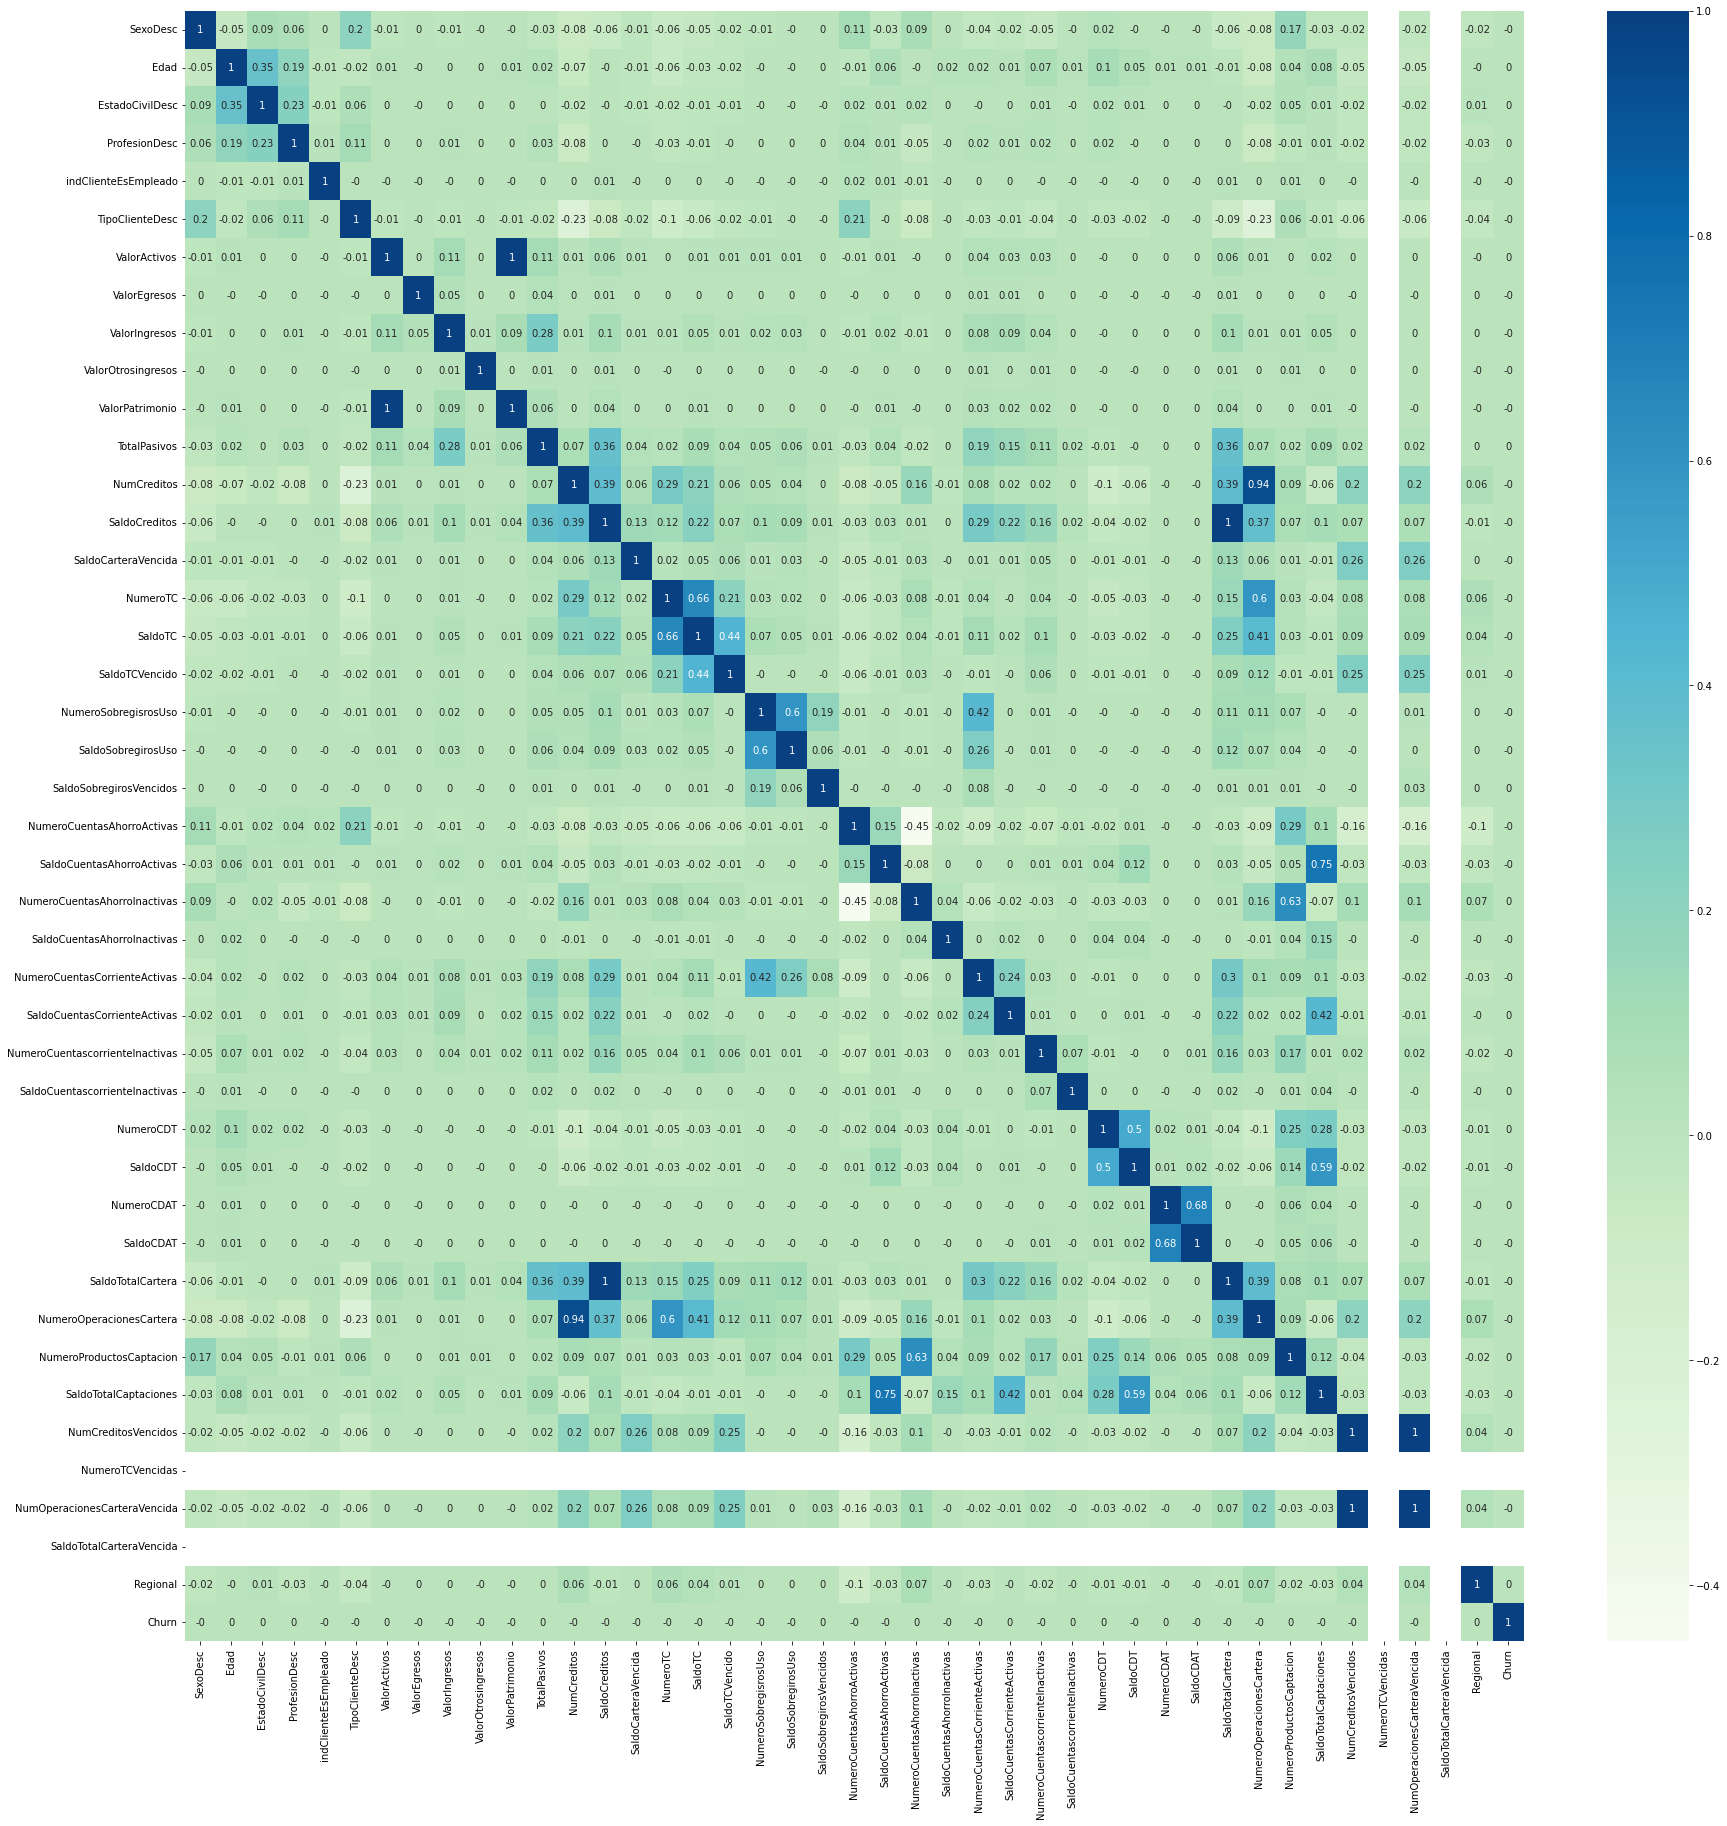

In [44]:
#Correlación de las variables 
plt.figure(figsize=(30,30))
sns.heatmap(round(df5.corr(),2),annot=True,mask=None,cmap='GnBu')
plt.show()

In [45]:
#Selección de variables dependientes e independietes
X = df5.drop(['Churn'], axis=1)
Y= df5['Churn']

In [46]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
from collections import Counter

import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

# Importing modelling libraries
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.calibration import CalibratedClassifierCV

In [47]:
# División de la matriz en datos de entrenamiento (70%) y  prueba (30%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [48]:
#Definición de los modelos de entrenamiento
DTclassifier = DecisionTreeClassifier()
RandomForestclassifier = RandomForestClassifier()
LOGISTICclassifier = LogisticRegression()

##### Modelo de árbol de decisión

In [49]:
DTclassifier.fit(X_train, Y_train)

DecisionTreeClassifier()

##### Modelo clasificador RandomForest

In [50]:
RandomForestclassifier.fit(X_train, Y_train)

RandomForestClassifier()

##### Modelo Regresión logistica

In [51]:
LOGISTICclassifier.fit(X_train, Y_train)

LogisticRegression()

##### Evaluación de los modelos con los datos de prueba

In [52]:
DTpred = DTclassifier.predict(X_train)
RFpred = RandomForestclassifier.predict(X_train)
LOGISTICpred = LOGISTICclassifier.predict(X_train)

#### Métricas de Accuracy de cada uno de los modelos entrenados

In [53]:
DTaccuracy = accuracy_score(Y_train, DTpred)
print("Accuracy of the Decision Tree Classifier: ",DTaccuracy)

RFaccuracy = accuracy_score(Y_train, RFpred)
print("Accuracy of the Random Forest Classifier: ",RFaccuracy)

LOGISTICaccuracy = accuracy_score(Y_train, LOGISTICpred)
print("Accuracy of the Logistic Regression Classifier: ",LOGISTICaccuracy)

Accuracy of the Decision Tree Classifier:  0.9992875315211202
Accuracy of the Random Forest Classifier:  0.9992875315211202
Accuracy of the Logistic Regression Classifier:  0.5007615558740782


A continuación se muestran la matriz de confusión  para cada uno de los modelos con los datos de entrenamiento y datos de prueba

##### Modelo de árbol de decisión

In [54]:
cmDT = confusion_matrix(Y_train,DTpred)
cmDT

array([[178096,    100],
       [   154, 178157]], dtype=int64)

In [55]:
print(classification_report(Y_train, DTpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    178196
           1       1.00      1.00      1.00    178311

    accuracy                           1.00    356507
   macro avg       1.00      1.00      1.00    356507
weighted avg       1.00      1.00      1.00    356507



In [56]:
DTpred2 = DTclassifier.predict(X_test)
cmDT2 = confusion_matrix(Y_test,DTpred2)
cmDT2

array([[37970, 38357],
       [38384, 38079]], dtype=int64)

In [57]:
print(classification_report(Y_test, DTpred2))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50     76327
           1       0.50      0.50      0.50     76463

    accuracy                           0.50    152790
   macro avg       0.50      0.50      0.50    152790
weighted avg       0.50      0.50      0.50    152790



Hay sobreajuste del modelo

##### Modelo clasificador RandomForest

In [58]:
cmRF = confusion_matrix(Y_train,RFpred)
cmRF

array([[178058,    138],
       [   116, 178195]], dtype=int64)

In [59]:
print(classification_report(Y_train, RFpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    178196
           1       1.00      1.00      1.00    178311

    accuracy                           1.00    356507
   macro avg       1.00      1.00      1.00    356507
weighted avg       1.00      1.00      1.00    356507



In [60]:
RFpred2 = RandomForestclassifier.predict(X_test)
cmRF2 = confusion_matrix(Y_test,RFpred2)
cmRF2

array([[40012, 36315],
       [40375, 36088]], dtype=int64)

In [61]:
print(classification_report(Y_test, RFpred2))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51     76327
           1       0.50      0.47      0.48     76463

    accuracy                           0.50    152790
   macro avg       0.50      0.50      0.50    152790
weighted avg       0.50      0.50      0.50    152790



##### Modelo Regresión logistica

In [62]:
cmLOGISTIC= confusion_matrix(Y_train,LOGISTICpred)
cmLOGISTIC

array([[149854,  28342],
       [149640,  28671]], dtype=int64)

In [63]:
print(classification_report(Y_train, LOGISTICpred))

              precision    recall  f1-score   support

           0       0.50      0.84      0.63    178196
           1       0.50      0.16      0.24    178311

    accuracy                           0.50    356507
   macro avg       0.50      0.50      0.44    356507
weighted avg       0.50      0.50      0.44    356507



In [64]:
import joblib
joblib.dump(DTclassifier, 'model.pkl')
TD2=joblib.load('model.pkl')

In [66]:
importances = TD2.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = df5.columns[1:]
 
for f in range(X_test.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) EstadoCivilDesc                0.105478
 2) ValorIngresos                  0.092268
 3) TotalPasivos                   0.090243
 4) ValorOtrosingresos             0.088682
 5) NumCreditosVencidos            0.086273
 6) NumCreditos                    0.081110
 7) ValorEgresos                   0.068281
 8) NumeroCuentasAhorroInactivas   0.051631
 9) NumeroCuentasCorrienteActivas  0.050206
10) NumeroOperacionesCartera       0.049874
11) SaldoCarteraVencida            0.048108
12) ProfesionDesc                  0.031309
13) Churn                          0.027864
14) SaldoTCVencido                 0.018772
15) indClienteEsEmpleado           0.016864
16) Edad                           0.013028
17) SaldoTotalCaptaciones          0.012213
18) SaldoCuentasAhorroInactivas    0.009834
19) NumeroProductosCaptacion       0.009282
20) SaldoCreditos                  0.008446
21) SaldoCuentasAhorroActivas      0.006088
22) ValorPatrimonio                0.005004
23) NumeroTC                    

explainer = shap.Explainer(TD2.predict, X_test)
shap_values = explainer(X_test)

shap.plots.bar(shap_values)

### Ajuste de hiperparámetros y cross validation

##### Modelo árbol de decisión evaluado con criterio de Gini

>1, train: 0.500, test: 0.500
>2, train: 0.500, test: 0.500
>3, train: 0.500, test: 0.500
>4, train: 0.501, test: 0.500
>5, train: 0.501, test: 0.500
>6, train: 0.501, test: 0.501
>7, train: 0.502, test: 0.500
>8, train: 0.503, test: 0.500
>9, train: 0.503, test: 0.500
>10, train: 0.504, test: 0.500
>11, train: 0.504, test: 0.500
>12, train: 0.505, test: 0.500
>13, train: 0.506, test: 0.500
>14, train: 0.507, test: 0.500
>15, train: 0.508, test: 0.500
>16, train: 0.509, test: 0.501
>17, train: 0.510, test: 0.501
>18, train: 0.512, test: 0.501
>19, train: 0.513, test: 0.501
>20, train: 0.515, test: 0.501
>21, train: 0.517, test: 0.501
>22, train: 0.520, test: 0.501
>23, train: 0.522, test: 0.501
>24, train: 0.525, test: 0.501
>25, train: 0.528, test: 0.502
>26, train: 0.530, test: 0.501
>27, train: 0.533, test: 0.502
>28, train: 0.536, test: 0.501
>29, train: 0.539, test: 0.501


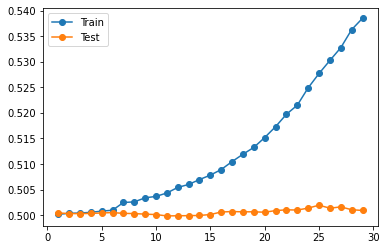

In [68]:
# Definición de las listas para colocar los scores obtenidos
train_scores, test_scores = list(), list()
# Definción de la máxima profundidad del arbol
values = [i for i in range(1, 30)]
for i in values:
	# Configuración del modelo
	model = DecisionTreeClassifier(max_depth=i, criterion = 'gini',min_samples_leaf=2)
	# fit model on the training dataset
	model.fit(X_train, Y_train)
	# Evaluación de los datos de entrenamiento
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(Y_train, train_yhat)
	train_scores.append(train_acc)
	# Evaluación en los datos de prueba
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(Y_test, test_yhat)
	test_scores.append(test_acc)
	# Valores obenidos apra cada profundidad
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# Gráfico de los datos de prueba y entrenamiento en función de la profundidad
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

# Alternativa 3

In [73]:
X = np.array(df5.drop(['Churn'],1))
Y= np.array(df5['Churn'])
# Splitting feature matrix for training (70%) and test (30%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y, random_state = 500)

C:\Users\Julian\AppData\Local\Temp\ipykernel_34176\3818031024.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [74]:
# data normalization with sklearn
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [75]:
r=26
DTclassifier = DecisionTreeClassifier(criterion = 'entropy',random_state=r)
XGBoostclassifier = XGBClassifier()
RandomForestclassifier = RandomForestClassifier(criterion = 'entropy')
SVMclassifier = SVC(kernel='rbf',probability=True)
LOGISTICclassifier = LogisticRegression()
KNNclassifier = KNeighborsClassifier()
GNBclassifier = GaussianNB() 
BaggingClassifier= BaggingClassifier(random_state=r)
NeuralNetworkClassifier= MLPClassifier(random_state=r)
GBM = GradientBoostingClassifier(random_state=r)

In [76]:
DTclassifier.fit(X_train, Y_train)
DTpred = DTclassifier.predict(X_test)
DTaccuracy = accuracy_score(Y_test, DTpred)
print("Accuracy of the Decision Tree Classifier: ",DTaccuracy)

Accuracy of the Decision Tree Classifier:  0.5006414032331958


In [77]:
XGBoostclassifier.fit(X_train, Y_train)
XGBpred = XGBoostclassifier.predict(X_test)
XGBaccuracy = accuracy_score(Y_test, XGBpred)
print("Accuracy of the XGBoost Classifier: ",XGBaccuracy)

Accuracy of the XGBoost Classifier:  0.49995418548334314


In [78]:
RandomForestclassifier.fit(X_train, Y_train)
RFpred = RandomForestclassifier.predict(X_test)
RFaccuracy = accuracy_score(Y_test, RFpred)
print("Accuracy of the Random Forest Classifier: ",RFaccuracy)

Accuracy of the Random Forest Classifier:  0.4992931474572943


In [79]:
LOGISTICclassifier.fit(X_train, Y_train)
LOGISTICpred = LOGISTICclassifier.predict(X_test)
LOGISTICaccuracy = accuracy_score(Y_test, LOGISTICpred)
print("Accuracy of the Logistic Regression Classifier: ",LOGISTICaccuracy)

Accuracy of the Logistic Regression Classifier:  0.49995418548334314


In [80]:
GNBclassifier.fit(X_train, Y_train)
GNBpred = GNBclassifier.predict(X_test)
GNBaccuracy = accuracy_score(Y_test, GNBpred)
print("Accuracy of the GNB Classifier: ", GNBaccuracy) 

Accuracy of the GNB Classifier:  0.5006937626808037


In [81]:
BaggingClassifier.fit(X_train, Y_train)
Baggingpred= BaggingClassifier.predict(X_test)
Baggingaccuracy = accuracy_score(Y_test, Baggingpred)
print("Accuracy of the Bagging Classifier: ", Baggingaccuracy)

Accuracy of the Bagging Classifier:  0.49892008639308855


In [82]:
NeuralNetworkClassifier.fit(X_train, Y_train)
NNpred= NeuralNetworkClassifier.predict(X_test)
NNaccuracy = accuracy_score(Y_test, NNpred)
print("Accuracy of the Neural Network Classifier: ", NNaccuracy)

Accuracy of the Neural Network Classifier:  0.501511879049676


In [83]:
GBM.fit(X_train, Y_train)
GBMpred= GBM.predict(X_test)
GBMaccuracy = accuracy_score(Y_test, GBMpred)
print("Accuracy of the GBM Classifier: ", GBMaccuracy)

Accuracy of the GBM Classifier:  0.5013417108449506


In [84]:
from transformers import pipeline

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [87]:
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, Y_train) # X is train samples and y is the corresponding labels

C:\Users\Julian\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning:

Training interrupted by user.



GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [ ]:
print('Best parameters found:\n', clf.best_params_)

In [ ]:
NeuralNetworkClassifierbest= MLPClassifier(activation={'tanh'},alpha={0.0001},hidden_layer_sizes={10, 30, 10},learning_rate={'adaptive'},solver={'sgd'})

In [ ]:
NeuralNetworkClassifierbest.fit(X_train, Y_train)
NNpred2=NeuralNetworkClassifierbest.predict(X_test)
NNaccuracy = accuracy_score(Y_test, NNpred2)
print("Accuracy of the Neural Network Classifier: ", NNaccuracy)

In [ ]:
#Selección de variables dependientes e independietes
X = df5.drop(['Churn'], axis=1)
Y= df5['Churn']
# División de la matriz en datos de entrenamiento (70%) y  prueba (30%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [ ]:
NeuralNetworkClassifierbest= MLPClassifier(activation='tanh',alpha=0.0001,hidden_layer_sizes={10, 30, 10},learning_rate='adaptive',solver='sgd')

In [ ]:
NeuralNetworkClassifierbest.fit(X_train, Y_train)
NNpred2=NeuralNetworkClassifierbest.predict(X_test)
NNaccuracy = accuracy_score(Y_test, NNpred2)
print("Accuracy of the Neural Network Classifier: ", NNaccuracy)